Audio https://dcase-repo.github.io/dcase_util/tutorial_audio.html

In [1]:
import dcase_util as du
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

Creating container https://dcase-repo.github.io/dcase_util/tutorial_audio.html#creating-container

In [2]:
# Generating two-channel audio:
audio_container = du.containers.AudioContainer(fs=44100)
t = np.linspace(0, 2, 2 * audio_container.fs, endpoint=False)
x1 = np.sin(220 * 2 * np.pi * t)
x2 = np.sin(440 * 2 * np.pi * t)
audio_container.data = np.vstack([x1, x2])

In [3]:
# Show container information:
audio_container.show()

AudioContainer :: Class
  Sampling rate                     : 44100 hz
  Channels                          : 2 
  Duration
    Seconds                         : 2.00 sec
    Milliseconds                    : 2000.00 ms
    Samples                         : 88200 samples
  Focus segment
    Duration
      Seconds                       : 2.00 sec
      Samples                       : 88200 sec
    Start point
      Seconds                       : 0.00 sec
      Samples                       : 0 samples
    Stop point
      Seconds                       : 2.00 sec
      Samples                       : 88200 samples



Loading and Saving https://dcase-repo.github.io/dcase_util/tutorial_audio.html#loading-and-saving

In [4]:
audio_container = du.containers.AudioContainer().load(
    filename=du.utils.Example.audio_filename()
)
audio_container.show()

AudioContainer :: Class
  Filename                          : E:\Miniconda3\lib\site-packages\dcase_util\utils\example_data\acoustic_scene.wav 
  Format                            : WAV (PCM_16, Signed 16 bit PCM) 
  Synced                            : Yes 
  Sampling rate                     : 44100 hz
  Channels                          : 2 
  Duration
    Seconds                         : 10.00 sec
    Milliseconds                    : 10000.02 ms
    Samples                         : 441001 samples
  Focus segment
    Duration
      Seconds                       : 10.00 sec
      Samples                       : 441001 sec
    Start point
      Seconds                       : 0.00 sec
      Samples                       : 0 samples
    Stop point
      Seconds                       : 10.00 sec
      Samples                       : 441001 samples



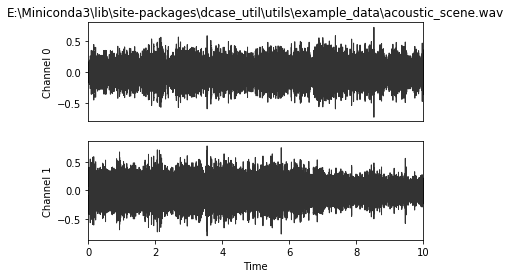

In [5]:
audio_container.plot()

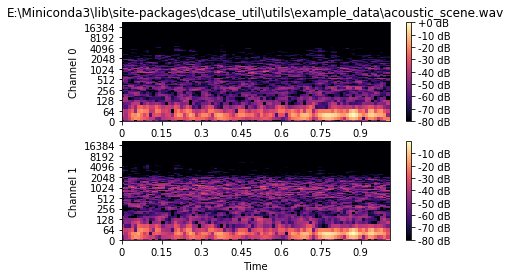

In [6]:
audio_container.set_focus(start=44100, stop=88200).plot_spec()

In [7]:
audio_container.show()

AudioContainer :: Class
  Filename                          : E:\Miniconda3\lib\site-packages\dcase_util\utils\example_data\acoustic_scene.wav 
  Format                            : WAV (PCM_16, Signed 16 bit PCM) 
  Synced                            : Yes 
  Sampling rate                     : 44100 hz
  Channels                          : 2 
  Duration
    Seconds                         : 10.00 sec
    Milliseconds                    : 10000.02 ms
    Samples                         : 441001 samples
  Focus segment
    Duration
      Seconds                       : 1.00 sec
      Samples                       : 44100 sec
    Start point
      Seconds                       : 1.00 sec
      Samples                       : 44100 samples
    Stop point
      Seconds                       : 2.00 sec
      Samples                       : 88200 samples



In [8]:
# Loading audio content from Youtube
yt_container = du.containers.AudioContainer().load_from_youtube(
    query_id='2ceUOv8A3FE',
    start=1,
    stop=5
)

In [9]:
yt_container.show()

AudioContainer :: Class
  Filename                          : C:\Users\zanco\AppData\Local\Temp\tmpuqqtc_50.webm 
  Format                            : WEBM 
  Synced                            : Yes 
  Sampling rate                     : 44100 hz
  Channels                          : 2 
  Duration
    Seconds                         : 4.00 sec
    Milliseconds                    : 4000.00 ms
    Samples                         : 176400 samples
  Focus segment
    Duration
      Seconds                       : 4.00 sec
      Samples                       : 176400 sec
    Start point
      Seconds                       : 0.00 sec
      Samples                       : 0 samples
    Stop point
      Seconds                       : 4.00 sec
      Samples                       : 176400 samples



Focus segment https://dcase-repo.github.io/dcase_util/tutorial_audio.html#focus-segment

In [10]:
# Using focus to get part data between 0.5 sec and 1.0 sec:
print(audio_container.set_focus(start_seconds=0.5, stop_seconds=1.0).get_focused().shape)

# Using focus to get part data starting 5 sec with 2 sec duration:
print(audio_container.set_focus(start_seconds=5, duration_seconds=2.0).get_focused().shape)

# Using focus to get part data starting 5 sec with 2 sec duration, mixdown of two stereo channels:
print(audio_container.set_focus(start_seconds=5, duration_seconds=2.0, channel='mixdown').get_focused().shape)

# Using focus to get part data starting 5 sec with 2 sec duration, left of two stereo channels:
print(audio_container.set_focus(start_seconds=5, duration_seconds=2.0, channel='left').get_focused().shape)

# Using focus to get part data starting 5 sec with 2 sec duration, seconds audio channel (indexing starts from 0):
print(audio_container.set_focus(start_seconds=5, duration_seconds=2.0, channel=1).get_focused().shape)

# Using focus to get part data between samples 44100 and 88200:
print(audio_container.set_focus(start=44100, stop=88200).get_focused().shape)

# Resetting focus and accessing full data matrix:
audio_container.reset_focus()
print(audio_container.get_focused().shape)

# Using focus to get part data starting 5 sec with 2 sec duration, and freeze this segment
# MODIFIES ORIGINAL DATA STRUCTURE, DON'T USE
# audio_container.set_focus(start_seconds=5, duration_seconds=2.0).freeze()
# print(audio_container.shape)
# audio_segment = du.containers.AudioContainer.load(audio_container)
# audio_segment.set_focus(start_seconds=5, duration_seconds=2.0).freeze()
# print(audio_container.shape)
# audio_segment.show()

(2, 22050)
(2, 88200)
(88200,)
(88200,)
(88200,)
(2, 44100)
(2, 441001)


Frames and Segments https://dcase-repo.github.io/dcase_util/tutorial_audio.html#frames-and-segments

In [11]:
# Splitting audio signal into overlapping frames (200ms frame length with 50% overlap):
audio_frame = audio_container.frames(frame_length_seconds=0.2, hop_length_seconds=0.1)
print(type(audio_frame), audio_frame.shape)

# Splitting audio signal into non-overlapping segments (1 sec):
data, segment_meta = audio_container.segments(segment_length_seconds=1.0)
print(len(data))
print(data[0].shape)
segment_meta.log_all()

<class 'numpy.ndarray'> (2, 8820, 99)
10
(2, 44100)


[I] MetaDataContainer :: Class
[I]   Items                             : 10 
[I]   Unique
[I]     Files                           : 0 
[I]     Scene labels                    : 0 
[I]     Event labels                    : 0 
[I]     Tags                            : 0 
[I] 
[I]   Meta data
[I]         Source                  Onset   Offset   Scene             Event             Tags              Identifier   
[I]         --------------------   ------   ------   ---------------   ---------------   ---------------   -----   
[I]         -                        0.00     1.00   -                 -                 -                 -       
[I]         -                        1.00     2.00   -                 -                 -                 -       
[I]         -                        2.00     3.00   -                 -                 -                 -       
[I]         -                        3.00     4.00   -                 -                 -                 -       
[I]     

Processing https://dcase-repo.github.io/dcase_util/tutorial_audio.html#processing

In [12]:
# Normalizing audio:
audio_container.normalize()

# Resampling audio to target sampling rate:
audio_container.resample(target_fs=16000)

Visualizations https://dcase-repo.github.io/dcase_util/tutorial_audio.html#visualizations

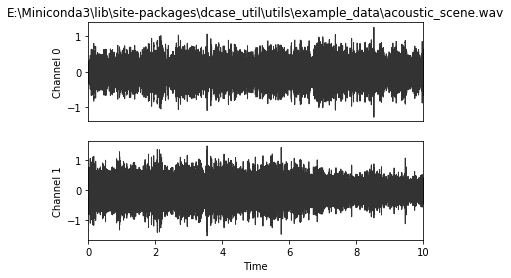

In [13]:
audio_container.plot_wave()

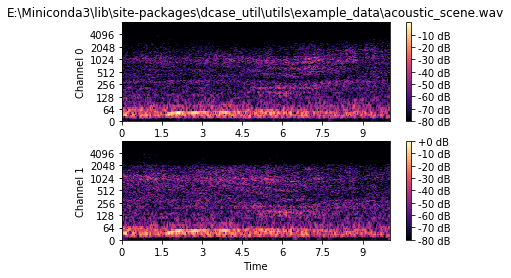

In [14]:
audio_container.plot_spec()

E:\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


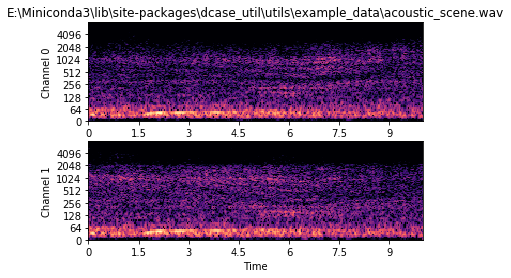

In [17]:
# Plot waveform and spectrogram together:
plt.figure()
plt.subplot(2, 1, 1)
audio_container.plot(plot_type='wave', plot=False, show_filename=False)
plt.subplot(2, 1, 2)
audio_container.plot(plot_type='spec', plot=False, show_filename=False, show_colorbar=False)
plt.show()